In [ ]:
import sys
from tensorflow import keras
import cv2
import numpy
import matplotlib
import skimage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from skimage.metrics import structural_similarity as ssim
from matplotlib import pyplot as plt
import numpy as np
import math
import os

%matplotlib inline

In [ ]:
np.set_printoptions(threshold=np.inf,linewidth=420)

In [ ]:
def psnr(target,ref):
    
    target_data=target.astype(float)
    ref_data=ref.astype(float)
    
    diff=ref_data-target_data
    diff=diff.flatten('C')
    
    rmse=math.sqrt(np.mean(diff**2.))
    
    return 20*math.log10(255./rmse)

def mse(target,ref):
    err=np.sum((target.astype('float')-ref.astype('float'))**2)
    err=err/float(target.shape[0]*target.shape[1])
    
    return err

def compare_images(target,ref):
    scores=[]
    scores.append(psnr(target,ref))
    scores.append(mse(target,ref))
    scores.append(ssim(target,ref,multichannel=True))
    return scores

In [ ]:
import os
import cv2


def prepare_images(path, factor):
    
    for file in os.listdir(path):
        
        img = cv2.imread(path + '/' + file)
        
        h, w, c = img.shape
        new_height = int(h / factor)
        new_width = int(w / factor)
        
        img = cv2.resize(img, (new_width, new_height), interpolation = cv2.INTER_LINEAR) 
        
        img = cv2.resize(img, (w, h), interpolation = cv2.INTER_LINEAR)
        print('Saving {}'.format(file))
        cv2.imwrite('images/{}'.format(file), img)

In [ ]:
prepare_images('source/',2)

Saving monarch.bmp
Saving woman_GT.bmp
Saving butterfly_GT.bmp
Saving zebra.bmp
Saving coastguard.bmp
Saving comic.bmp
Saving pepper.bmp
Saving bird_GT.bmp
Saving face.bmp
Saving baby_GT.bmp
Saving foreman.bmp
Saving baboon.bmp
Saving flowers.bmp
Saving ppt3.bmp
Saving lenna.bmp
Saving head_GT.bmp
Saving barbara.bmp


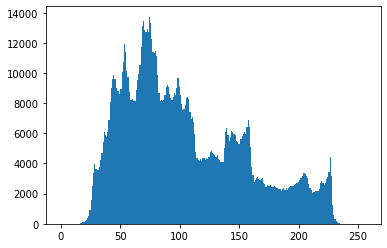

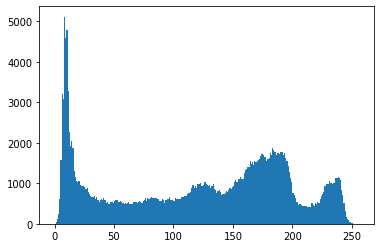

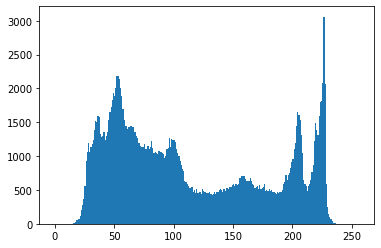

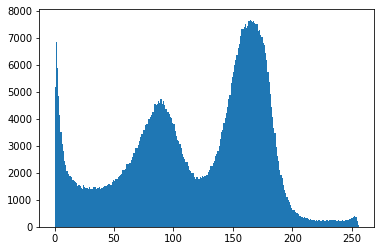

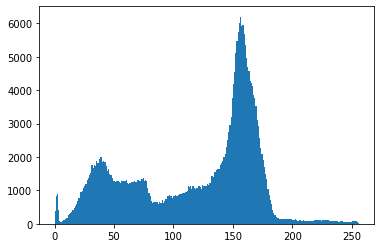

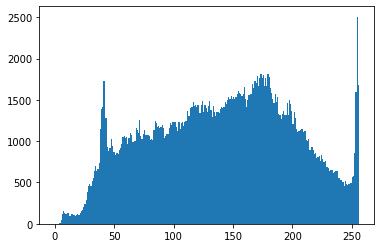

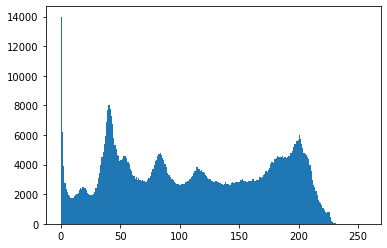

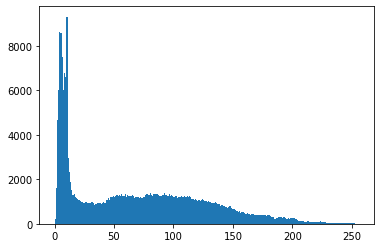

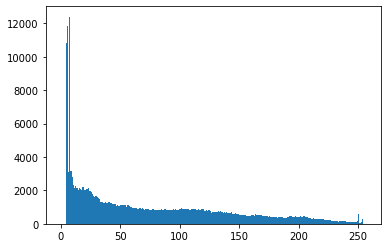

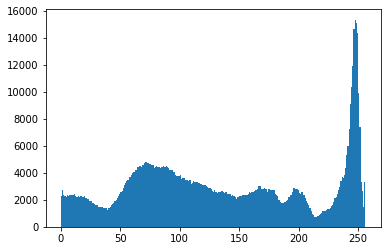

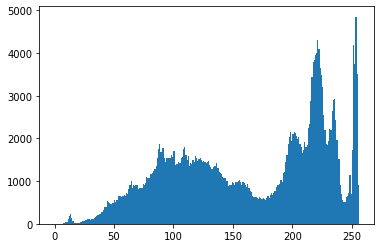

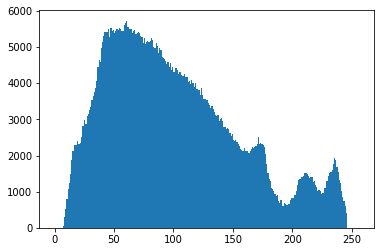

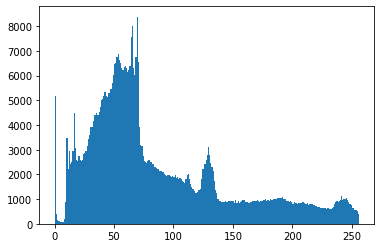

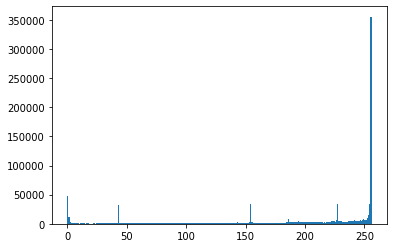

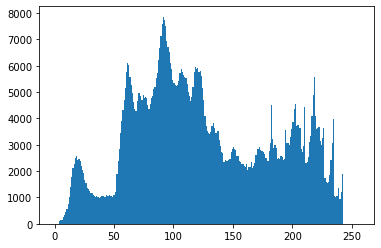

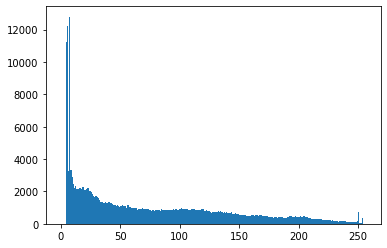

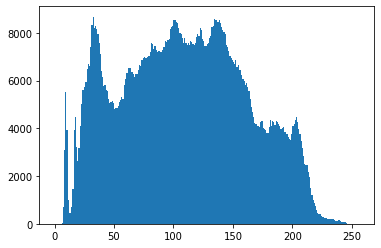

In [ ]:
for file in os.listdir('images/'):
    
    target=cv2.imread('images/{}'.format(file))

    plt.hist(target.ravel(),bins = 256, range = [0,256]) 
    plt.show()

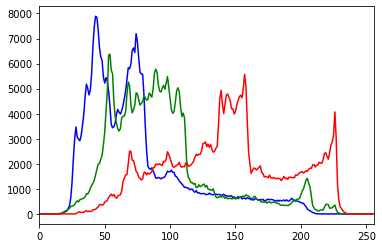

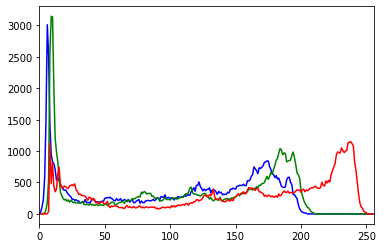

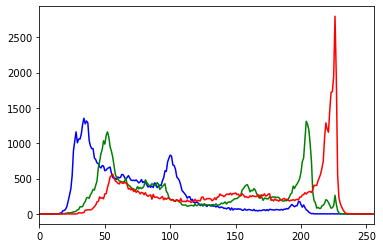

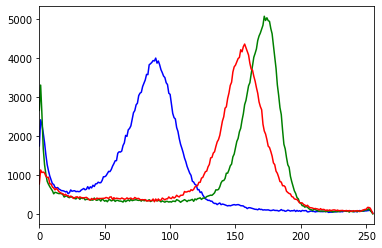

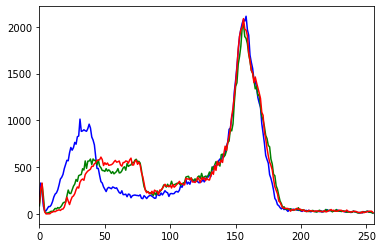

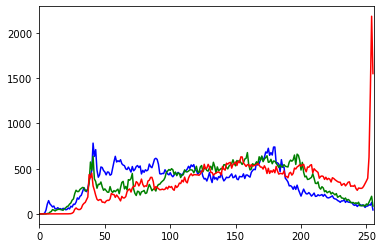

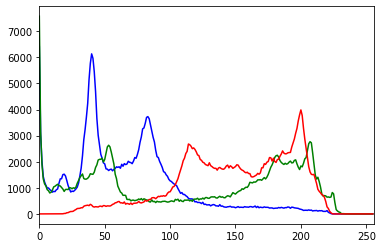

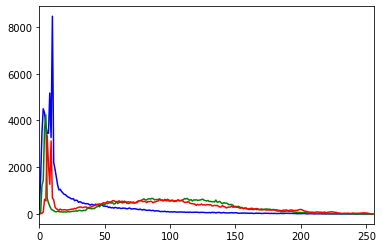

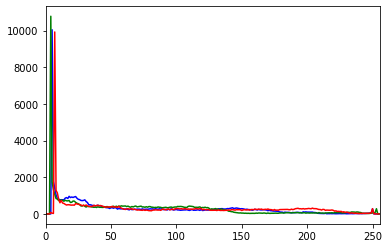

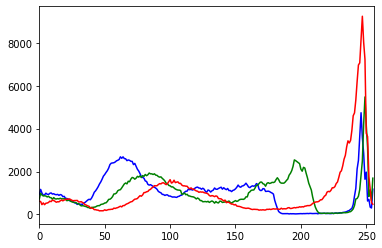

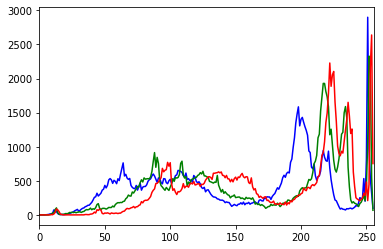

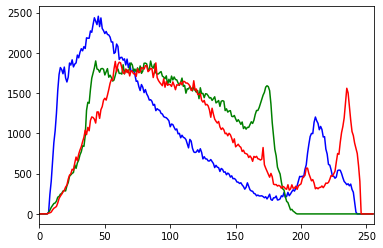

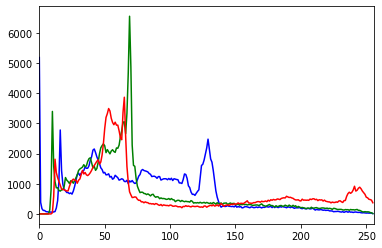

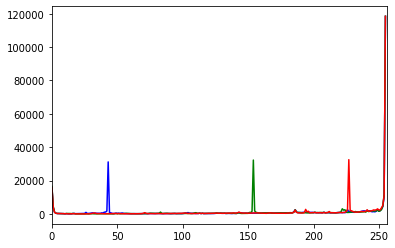

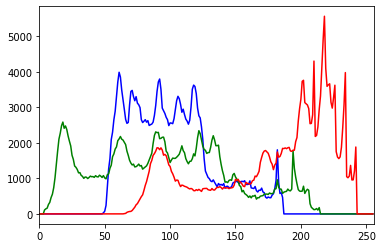

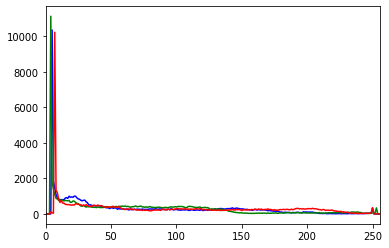

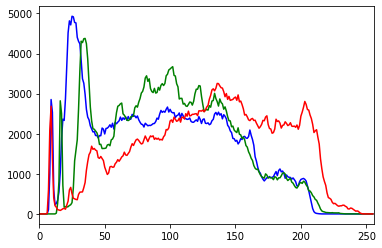

In [ ]:
for file in os.listdir('images/'):
    
    target=cv2.imread('images/{}'.format(file))
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([target],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

In [ ]:
for file in os.listdir('images/'):
    
    target=cv2.imread('images/{}'.format(file))
    ref = cv2.imread('source/{}'.format(file))
    
    scores=compare_images(target,ref)
    
    print('{}\nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(file, scores[0], scores[1], scores[2]))
        

monarch.bmp
PSNR: 30.196242365288896
MSE: 186.45643615722656
SSIM: 0.9439574293434104

woman_GT.bmp
PSNR: 29.326236280817465
MSE: 227.812729498164
SSIM: 0.9335397280466592

butterfly_GT.bmp
PSNR: 24.782076560337416
MSE: 648.6254119873047
SSIM: 0.8791344763843051

zebra.bmp
PSNR: 27.909840639329513
MSE: 315.6585459528818
SSIM: 0.8911656209329116

coastguard.bmp
PSNR: 27.161600663887082
MSE: 375.00887784090907
SSIM: 0.756950063354931

comic.bmp
PSNR: 23.799861502225532
MSE: 813.2338836565096
SSIM: 0.8347335416398209

pepper.bmp
PSNR: 29.88947161686106
MSE: 200.1033935546875
SSIM: 0.8357937568464359

bird_GT.bmp
PSNR: 32.896644728720005
MSE: 100.12375819830247
SSIM: 0.9533644866026473

face.bmp
PSNR: 30.99220650287191
MSE: 155.23189718546524
SSIM: 0.8008439492289884

baby_GT.bmp
PSNR: 34.371806409661986
MSE: 71.28874588012695
SSIM: 0.9356987872724932

foreman.bmp
PSNR: 30.14456532664372
MSE: 188.6883483270202
SSIM: 0.933268417388899

baboon.bmp
PSNR: 22.157084083442548
MSE: 1187.116133333

In [ ]:
def model():
    
    CNN = Sequential()
    
    CNN.add(Conv2D(filters=128, kernel_size = (9, 9), kernel_initializer='he_uniform',
                     activation='relu', padding='valid', use_bias=True, input_shape=(None, None, 1)))
    CNN.add(Conv2D(filters=64, kernel_size = (3, 3), kernel_initializer='he_uniform',
                     activation='relu', padding='same', use_bias=True))
    CNN.add(Conv2D(filters=1, kernel_size = (5, 5), kernel_initializer='he_uniform',
                     activation='linear', padding='valid', use_bias=True))
    
    adam = Adam(learning_rate=0.0003)
    
    CNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    
    return CNN

In [ ]:
get_model = model()
get_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 128)   10496     
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 64)    73792     
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 1)     1601      
                                                                 
Total params: 85,889
Trainable params: 85,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for layer in get_model.layers:
  weights = layer.get_weights()
  print(weights)

Streaming output truncated to the last 5000 lines.
          -6.66099861e-02,  2.94460133e-02,  4.84002382e-02,  1.68897212e-04, -7.03919455e-02, -1.69152133e-02, -3.06428745e-02,  6.38725013e-02,  4.93635237e-03,  2.85941586e-02,  5.16216457e-02,  5.31690121e-02, -6.25440329e-02, -3.54280882e-02,  3.42609957e-02,  3.24652568e-02, -4.91918474e-02, -1.41418017e-02,  6.58206791e-02,  3.35828587e-02,  4.95435968e-02,  4.73847464e-02,  7.71661103e-03,
          -6.16517290e-02, -3.61440629e-02,  3.62916738e-02,  6.31617606e-02, -7.11385533e-02, -4.29174080e-02,  4.42918539e-02,  3.35157737e-02,  6.74750507e-02, -2.90848874e-02,  1.90182626e-02, -4.53613698e-03,  6.93593174e-02,  6.02258295e-02,  3.52507904e-02,  6.92357272e-02, -2.40779854e-02,  3.69202793e-02],
         [ 5.52427769e-03,  4.83319089e-02, -2.20584571e-02, -5.57814464e-02, -5.34094870e-03, -7.49728084e-03,  6.21545166e-02,  2.59750411e-02,  3.31205428e-02,  8.87253881e-03,  7.11437315e-03, -4.70658392e-03,  4.68389317e-02, 

In [ ]:
def modcrop(img,scale):
    tmpsz=img.shape
    sz=tmpsz[0:2]
    
    sz=sz-np.mod(sz,scale)
    
    img=img[0:sz[0],1:sz[1]]
    return img

def shave(image,border):
    img=image[border: -border,border:-border]
    return img

In [ ]:
import h5py
def read_training_data(file):
    with h5py.File(file, 'r') as hf:
        l1 = numpy.array(hf.get('convolution2d_1'))
        l2 = numpy.array(hf.get('convolution2d_2'))
        l3 = numpy.array(hf.get('convolution2d_3'))
        train_data = numpy.transpose(l1, (0))

        print(train_data)
        # label = numpy.array(hf.get('label'))
        # train_data = numpy.transpose(data, (0, 2, 3, 1))
        # train_label = numpy.transpose(label, (0, 2, 3, 1))
        # return train_data, train_label
read_training_data("3051crop_weight_200.h5")

['convolution2d_1_W:0' 'convolution2d_1_b:0']


In [ ]:
def predict(image_path):
    
    cnn=model()
    cnn.load_weights('3051crop_weight_200.h5')

     
    path,file=os.path.split(image_path)
    degraded=cv2.imread(image_path)
    ref=cv2.imread('source/{}'.format(file))
    
    ref=modcrop(ref,3)
    degraded=modcrop(degraded,3)
    
    temp=cv2.cvtColor(degraded,cv2.COLOR_BGR2YCrCb)
    
    Y=numpy.zeros((1,temp.shape[0],temp.shape[1],1),dtype=float)
    
    Y[0,:,:,0]=temp[:,:,0].astype(float)/255

    pre=cnn.predict(Y, batch_size=50)
    
    
    pre*=255
    pre[pre[:]>255]=255
    pre[pre[:]<0] =0
    pre=pre.astype(np.uint8)
    
    
    temp=shave(temp,6)
    temp[:,:,0]=pre[0,:,:,0]
    
    output=cv2.cvtColor(temp,cv2.COLOR_YCrCb2BGR)
    
    ref = shave(ref.astype(np.uint8), 6
    degraded = shave(degraded.astype(np.uint8), 6)
    
    scores = []
    scores.append(compare_images(degraded, ref))
    scores.append(compare_images(output, ref))
    
    return ref, degraded, output, scores

Degraded Image: 
PSNR: 27.248686459559124
MSE: 367.56400047398984
SSIM: 0.8690622024599293

Reconstructed Image: 
PSNR: 29.660197682816325
MSE: 210.95112572579689
SSIM: 0.8989099632535621



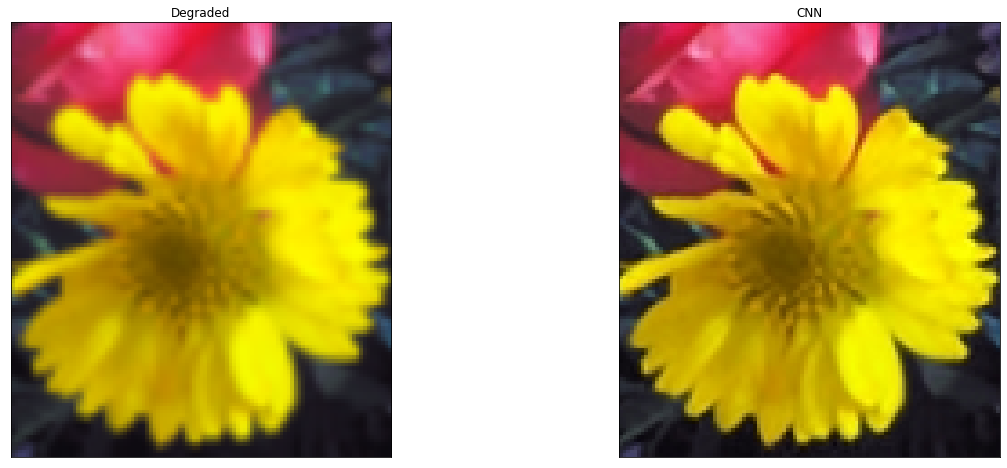

In [ ]:
ref,degraded,output,scores=predict('images/flowers.bmp')
print('Degraded Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[0][0], scores[0][1], scores[0][2]))
print('Reconstructed Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[1][0], scores[1][1], scores[1][2]))


fig, axs = plt.subplots(1, 2, figsize=(20, 8))
# axs[0].imshow(cv2.cvtColor(ref[90:210, 55:160], cv2.COLOR_BGR2RGB))
# axs[0].set_title('Original')
axs[0].imshow(cv2.cvtColor(degraded[90:210, 55:160], cv2.COLOR_BGR2RGB))
axs[0].set_title('Degraded')
axs[1].imshow(cv2.cvtColor(output[90:210, 55:160], cv2.COLOR_BGR2RGB))
axs[1].set_title('CNN')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
for file in os.listdir('images'):
    
    ref, degraded, output, scores = predict('images/{}'.format(file))
    
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    # axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
    # axs[0].set_title('Original')
    axs[0].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Degraded')
    axs[0].set(xlabel = 'PSNR: {}\nMSE: {} \nSSIM: {}'.format(scores[0][0], scores[0][1], scores[0][2]))
    axs[1].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    axs[1].set_title('CNN')
    axs[1].set(xlabel = 'PSNR: {} \nMSE: {} \nSSIM: {}'.format(scores[1][0], scores[1][1], scores[1][2]))

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])